# Binary image classification

Now, you will have a chance to practice with custom datasets.

Before continuing, get the chrome extension [Fatkun](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf).

Once you add, search google images for two of your favorite fictional characters, and scrape the results using Fatkun. In order to load the images scroll down the page all the way (but do not click "show more"). Then, click Fatkun icon on the toolbar, followed a click on select all and download. 

*Note:* You should have a default download page set up, otherwise the browser will open many tabs.

You can also use the datasets provided in the repository containing images of Darth Vader and Batman.

<br>

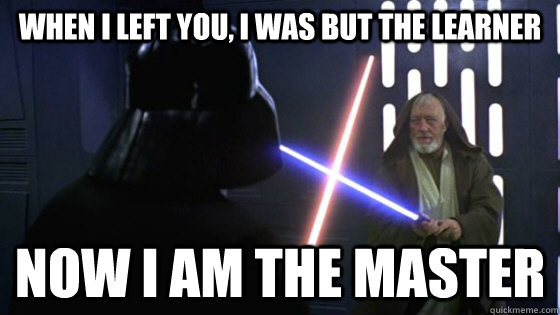

<br>

Unzip the images

In [9]:
import zipfile
import os
import random

# replace by the path to the folder containing the zip files
parent_folder = "/home/joao/Projects/convnets/data/"

zip0 = "batman.zip" # replace by he name of one zip file
zip_ref = zipfile.ZipFile(os.path.join(parent_folder, zip0), 'r')
fictional0 = "batman" # replace by he name of one character
zip_ref.extractall(os.path.join(parent_folder))
zip_ref.close()

zip1 = "vader.zip" # replace by he name of one zip file
zip_ref = zipfile.ZipFile(os.path.join(parent_folder, zip1), 'r')
fictional1 = "vader" # replace by he name of one character
zip_ref.extractall(os.path.join(parent_folder))
zip_ref.close()

In [10]:
print("Folder 0 has {} images".format(len(os.listdir(os.path.join(parent_folder, fictional0)))))
print("Folder 1 has {} images".format(len(os.listdir(os.path.join(parent_folder, fictional1)))))

Folder 0 has 369 images
Folder 1 has 359 images


Next, we prepare to load the data

In [11]:
try:
    # Create folders for the training and test datasets
    train_dir = os.path.join(parent_folder, "train")
    test_dir = os.path.join(parent_folder, "test")
    os.mkdir(train_dir)
    os.mkdir(test_dir)

    # Subdirectories with our training images
    train_0_dir = os.path.join(train_dir, fictional0)
    train_1_dir = os.path.join(train_dir, fictional1)
    os.mkdir(train_0_dir)
    os.mkdir(train_1_dir)

    # Subdirectories with our training images
    test_0_dir = os.path.join(test_dir, fictional0)
    test_1_dir = os.path.join(test_dir, fictional1)
    os.mkdir(test_0_dir)
    os.mkdir(test_1_dir)
except:
    print("Folders already exist")
    

**Exercise:** Write a function to split the data between train and test datasets.

In [12]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copied to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is 'batman', and SPLIT SIZE is .8
# Then 80% of the images in 'batman' will be copied to the TRAINING dir
# and 20% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

import math
import os
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    fnames = os.listdir(SOURCE)
    fimages = []
    for fname in fnames:
        if os.path.getsize(os.path.join(SOURCE, fname)) > 0:
            fimages.append(fname)
        else:
            print("{} is zero length, so ignoring".format(fname))
    fnames = None
            
    nr_imgs = len(fimages)
    nr_train_imgs = math.floor(nr_imgs * SPLIT_SIZE)
    nr_test_imgs = nr_imgs - nr_train_imgs
    fimages = random.sample(fimages, nr_imgs)
    train_fimages = fimages[:nr_train_imgs]
    test_fimages = fimages[nr_train_imgs:]
    
    for fname in train_fimages:
        copyfile(os.path.join(SOURCE, fname),
                os.path.join(TRAINING, fname))
        
    for fname in test_fimages:
        copyfile(os.path.join(SOURCE, fname),
                os.path.join(TESTING, fname))
# YOUR CODE ENDS HERE

# Confirm if these variables are correct
SOURCE_DIR_0 = os.path.join(parent_folder, fictional0)
TRAINING_DIR_0 = train_0_dir
TESTING_DIR_0 = test_0_dir
SOURCE_DIR_1 = os.path.join(parent_folder, fictional1)
TRAINING_DIR_1 = train_1_dir
TESTING_DIR_1 = test_1_dir

split_size = .8
split_data(SOURCE_DIR_0, TRAINING_DIR_0, TESTING_DIR_0, split_size)
split_data(SOURCE_DIR_1, TRAINING_DIR_1, TESTING_DIR_1, split_size)

The number of images in each folder is printed below.

In [13]:
print(len(os.listdir(train_0_dir)))
print(len(os.listdir(train_1_dir)))
print(len(os.listdir(test_0_dir)))
print(len(os.listdir(test_1_dir)))

295
287
74
72


Preprocess the images in order to be able to feed to a classification model

In [14]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_dir
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=2,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = test_dir
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=2,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 570 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


Build the model that is going to classify the images

In [15]:
# DEFINE A KERAS MODEL TO PERFORM BINARY IMAGE CLASSIFICATION
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HER
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class and 1 for the other
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

W1018 01:56:49.286539 140177325213504 deprecation.py:506] From /home/joao/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1018 01:56:49.471711 140177325213504 deprecation.py:323] From /home/joao/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
156/285 [===============>..............] - ETA: 8s - loss: 0.8379 - acc: 0.5353

/home/joao/anaconda3/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


285/285 [==============================] - 21s 74ms/step - loss: 0.7821 - acc: 0.5860 - val_loss: 0.8979 - val_acc: 0.5034
Epoch 2/5
285/285 [==============================] - 22s 78ms/step - loss: 0.6565 - acc: 0.6965 - val_loss: 0.6098 - val_acc: 0.6690
Epoch 3/5
285/285 [==============================] - 21s 75ms/step - loss: 0.5392 - acc: 0.7632 - val_loss: 0.7972 - val_acc: 0.6483
Epoch 4/5
285/285 [==============================] - 22s 76ms/step - loss: 0.4762 - acc: 0.8228 - val_loss: 0.5766 - val_acc: 0.7862
Epoch 5/5
285/285 [==============================] - 21s 75ms/step - loss: 0.3727 - acc: 0.8789 - val_loss: 0.7701 - val_acc: 0.7793


73/73 [==============================] - 4s 50ms/step - loss: 0.7701 - acc: 0.7793


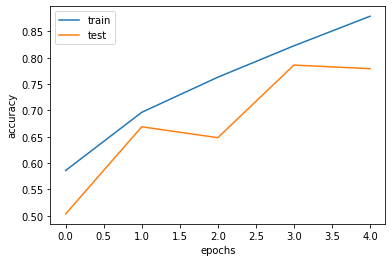

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

model.evaluate(validation_generator)

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Test the model with two examples

Use the model to classify other images.

In [18]:
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

img_path = "/home/joao/Projects/convnets/data/the-dark-knight-rises-christian-bale-batman-2012.png"
img = load_img(img_path, target_size=(150, 150))

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)

model.predict(x)[0][0]

0.0

In [19]:
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

img_path = "/home/joao/Projects/convnets/data/Vaderabuse.png"
img = load_img(img_path, target_size=(150, 150))

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)

model.predict(x)[0][0]

1.0

## Visualize intermediate layers

We can see which regions of the images are being activated.

/home/joao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


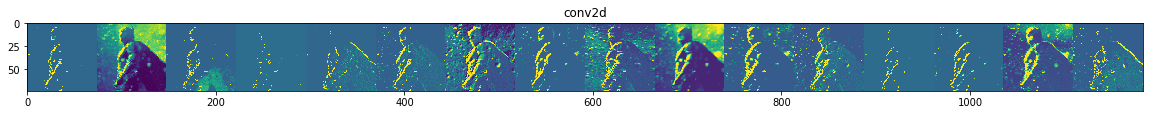

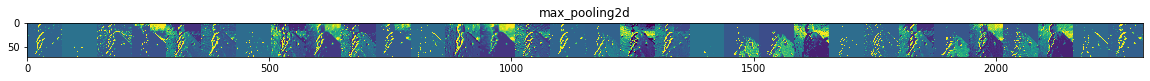

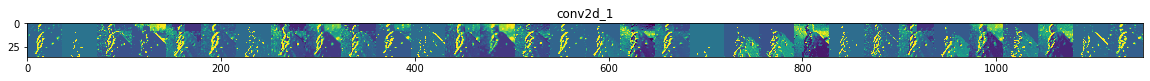

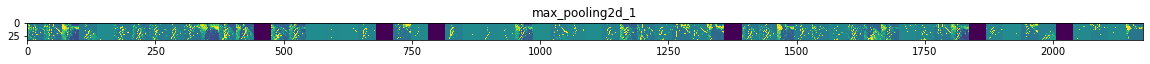

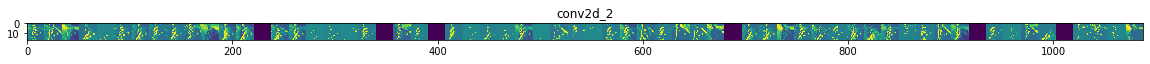

In [22]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# input an image
img_path = "/home/joao/Projects/convnets/data/the-dark-knight-rises-christian-bale-batman-2012.png"
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 